In [57]:
import pandas as pd
import string
from helperFunctions import *
from matplotlib import pyplot as plt
import numpy as np

In [58]:
#change the path to the location of the tweets.csv file on your computer
df_tweets = pd.read_csv("../data/tweets.csv")

In [59]:
tweets = df_tweets['content'].tolist()
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [63]:
#change the path to the location of the common_abb_keyword.csv file on your computer
df_abbreviations = pd.read_csv('../data/common_abb_keyword.csv')
df_abbreviations.head()


,Acronym,Expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever


In [64]:
abbreviations_dict = df_abbreviations.set_index('Acronym')['Expansion'].to_dict()
abbreviations_dict

{'2day': 'today',
 '2m2h': 'too much too handle',
 '2moro': 'tomorrow',
 '2nite': 'tonight',
 '4eae': 'for ever and ever',
 'aaf': 'always and forever',
 'aar': 'at any rate',
 'aayf': 'as always your friend',
 'abd': 'already been done',
 'ack': 'acknowledge',
 'adih': 'another day in hell',
 'adn': 'any day now',
 'adr': 'all due respect',
 'aeap': 'as early as possible',
 'afaic': 'as far as i am concerned',
 'afaik': 'as far as i know',
 'aka': 'also known as',
 'ama': 'ask me anything against medical advice',
 'ambw': 'all my best wishes',
 'aml': 'all my love',
 'aota': 'all of the above',
 'asap': 'as soon as possible',
 'atb': 'all the best',
 'ateotd': 'at the end of the day',
 'atm': 'at the moment automated teller machine ',
 'awol': 'absent without leave',
 'aydy': 'are you done yet',
 'ayec': 'at your earliest convenience',
 'ayor': 'at your own risk',
 'ays': 'are you serious',
 'aysos': 'are you stupid or something',
 'ayt': 'are you there',
 'b/c': 'because',
 'b4': 'be

In [65]:
def replace_abbreviations(tweet, abbreviations_dict):
    
    results = []
    for sentence in tweet:
        words = sentence.split()
        for i, word in enumerate(words):
            stripped_word = word.strip(string.punctuation)
            for key, value in abbreviations_dict.items():
                if stripped_word == key:
                    words[i] = value+ word[len(stripped_word):]
                    break
        results.append(" ".join(words))
    return results

In [66]:
results = replace_abbreviations(tweets[:100], abbreviations_dict)

for i in range(100):
    print(tweets[i])
    print(results[i])

Love it!
Love it!
So awesome. Read my morning meditation anytime I want. Great app im glad i purchased upgraded so no commercials or advertisements.
So awesome. Read my morning meditation anytime I want. Great app instant message glad i purchased upgraded significant other shout out no commercials or advertisements.
Just replaced one add with another, albeit AA related. Couldn't get sobriety date to show. Dislike notifications not being dismissable. Refunded until fixed.
Just replaced one add with another, albeit AA related. Couldn't get sobriety date time out show. Dislike notifications not being dismissable. Refunded until fixed.
Don't bother upgrading. There is zero difference between free and paid. I still get ads every time I open to the meditation passage. It says you can do things like track sobriety date-doesn't. There is no "contact us" info. But they seemed to gladly take my money.
Don't bother upgrading. There is zero difference between free and paid. I still get ads every t

In [67]:
# Generate some evaluation points
#tVals is a list of values of possible number of tweets
tVals = [2**k for k in range(9)] 
tVals += [k*10 for k in range(20)]
tVals += [k*50 for k in range(2,25)]
tVals.sort() # put them in order
print(tVals)

[0, 1, 2, 4, 8, 10, 16, 20, 30, 32, 40, 50, 60, 64, 70, 80, 90, 100, 100, 110, 120, 128, 130, 140, 150, 150, 160, 170, 180, 190, 200, 250, 256, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200]


In [34]:
tValsRec, timeValsRec = calculateTimeForEachN(replace_abbreviations, tVals, tweets, abbreviations_dict, numTrials=5)

Text(0.5, 1.0, 'Keyword Replacement Algorithm')

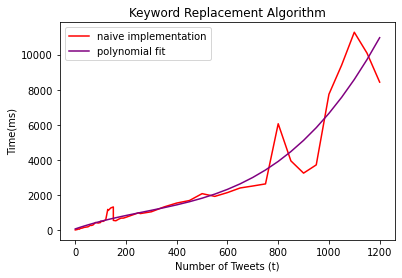

In [48]:
plt.plot(tValsRec, timeValsRec, color="red", label="naive implementation")
# after we look at the data, change the False flag to True to fit a quadratic
if True:
    coeffs = np.polyfit( tValsRec, timeValsRec, 3 )
    plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*t**3 for t in tValsRec], color="purple", label="polynomial fit")
   
plt.xlabel("Number of Tweets (t)")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Algorithm")